In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices-dataset/Housing.csv


#Objectives
- Applying Simple Linear Regression (Without Splitting)
- Applying Linear Regression with Splitting

In [2]:
#Loading the dataset in a dataframe
raw_df=pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")
raw_df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [3]:
raw_df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

The columns Mainroad, Guestroom, Basement, Hotwaterheating, Airconditioning, Prefaarea,  are all object class. For correlation studies we are converting the values to binary classification
Yes=1
No=0

For Furnishingstatus column we are writing furnished=1, semi-furnished=2, unfurnished=0

In [4]:
cols_to_replace=["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
raw_df[cols_to_replace]=raw_df[cols_to_replace].replace({"yes":1, "no":0})
raw_df.head(4)

<ipython-input-4-2fefa72ad75c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_df[cols_to_replace]=raw_df[cols_to_replace].replace({"yes":1, "no":0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished


In [5]:
raw_df["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [6]:
raw_df["furnishingstatus"]=raw_df["furnishingstatus"].replace({"furnished":1, "semi-furnished":2, "unfurnished":0})
raw_df.head()

<ipython-input-6-d8c55f6fe77b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_df["furnishingstatus"]=raw_df["furnishingstatus"].replace({"furnished":1, "semi-furnished":2, "unfurnished":0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


- Finding correlation between the columns 

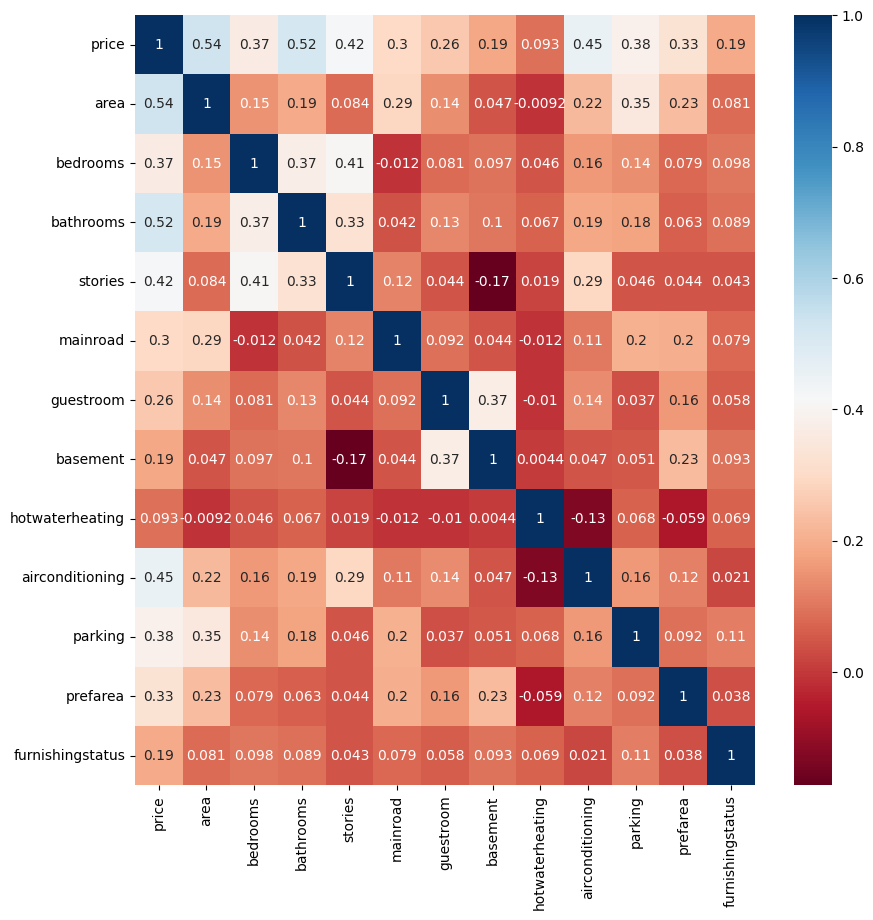

In [7]:
corr=raw_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="RdBu")
plt.show()

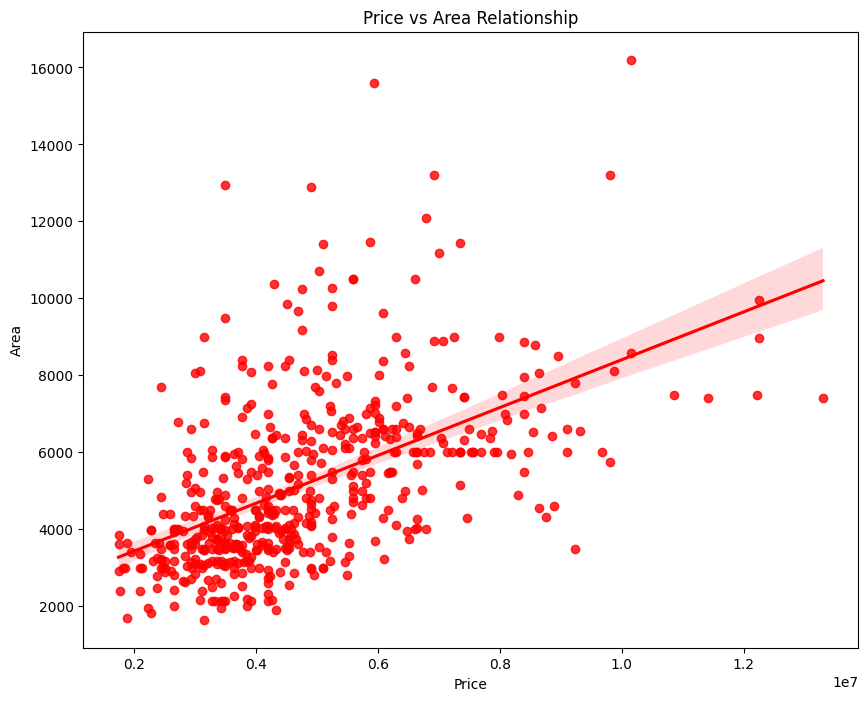

In [8]:
plt.figure(figsize=(10,8))
sns.regplot(x="price", y="area", data=raw_df, color="red")
plt.xlabel("Price")
plt.ylabel("Area")
plt.title("Price vs Area Relationship")
plt.show()

The Price and Area shows a good linear relationship. We will build a simple model based on these two variables. Here we want to predict the price of a property based on its area. So price is the target variable and area is the input variable.

The relationship is **Y=mX+C**** where Y is the Price and X is the Area respectively

In [9]:
x=raw_df[["area"]]
y=raw_df["price"]


In [10]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression()

In [11]:
lm.fit(x,y)
y_hat=lm.predict(x)
c=lm.intercept_
m=lm.coef_
print("The intercept is", c)
print("The slope is", m)


The intercept is 2387308.4823964303
The slope is [461.97489427]


There the model is  > ***Price=461.97*Area+ 2387308.48*******